In [1]:
import omega

import networkx as nx

from omega.games import enumeration as enum
from omega.symbolic import fol as _fol
from omega.symbolic import temporal as symbolic

import matplotlib.pyplot as plt

from tulip import transys, abstract, spec, synth



`omega.symbolic.symbolic` failed to import `dd.cudd`.
Will use `dd.autoref`.
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/mathset.py:719: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/mathset.py:719: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1218: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1226: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/kimiahassibi/Desktop/Caltech/SURF2023/env/lib/python3.8/site-packages/tulip-1.4.0-py3.8.egg/tulip/transys/labeled_graphs.py:1218: SyntaxWarning: "is" with a literal

In [5]:
spec.lexyacc.parse("LPAREN ~ ITE LPAREN b_0 COMMA ITE LPAREN b_0' COMMA TRUE, LPAREN ~ b_1' RPAREN RPAREN COMMA LPAREN ~ ITE LPAREN b_1 COMMA b_0' COMMA TRUE RPAREN RPAREN RPAREN RPAREN")

Error  : NAME . LexToken(NAME,'ITE',1,9)


Exception: Syntax error at "ITE"
remaining input:
LPAREN b_0 COMMA ITE LPAREN b_0 ' COMMA TRUE , LPAREN b_1 ' RPAREN RPAREN COMMA LPAREN ITE LPAREN b_1 COMMA b_0 ' COMMA TRUE RPAREN RPAREN RPAREN RPAREN


In [ ]:
"LPAREN ~ ITE LPAREN b_0 COMMA ITE LPAREN b_0' COMMA TRUE, LPAREN ~ b_1' RPAREN RPAREN COMMA LPAREN ~ ITE LPAREN b_1 COMMA b_0' COMMA TRUE RPAREN RPAREN RPAREN RPAREN"

In [ ]:
"(~ ite(b_0, ite(b_0', TRUE, (~ b_1')), (~ ite(b_1, b_0', TRUE))))"

In [5]:
from tulip.spec import LTL
f = LTL()
print(f)

In [6]:
from tulip.spec import GRSpec
f = GRSpec(sys_vars={"p"}, sys_prog=["p"])
print(f.dumps())

0  # Version
%%

OUTPUT:
p : boolean;

%%
[]<>(p)


In [7]:
print(f)

[]<>(p)


In [8]:
print(f.pretty())

ENVIRONMENT VARIABLES:
	(none)

SYSTEM VARIABLES:
	p	boolean

FORMULA:
ASSUMPTION:
GUARANTEE:
    LIVENESS
	  []<>(p)



In [26]:
aut = symbolic.Automaton()
aut.declare_variables(x='bool', y=(0, 17))
init = aut.add_expr('x /\ (y = 1)')
action = aut.add_expr('''
    /\ ( (x /\ (y = 1)) => (~ x' /\ (y' = 2)) )
    /\ ( (~ x /\ (y = 2)) => (x' /\ (y' = 1)) )
    ''')
g = enum.enumerate_state_machine(init, action, aut)
assert len(g) == 2, len(g)
e = list(g.edges())
assert len(e) == 2, len(e)

In [25]:
print(aut)

Automaton:
Variables: 
 {'x': {'type': 'bool'},
 "x'": {'type': 'bool'},
 'y': {'bitnames': ['y_0', 'y_1', 'y_2', 'y_3', 'y_4'],
       'dom': (0, 17),
       'signed': False,
       'type': 'int',
       'width': 5},
 "y'": {'bitnames': ["y_0'", "y_1'", "y_2'", "y_3'", "y_4'"],
        'dom': (0, 17),
        'signed': False,
        'type': 'int',
        'width': 5}}
win =
{}


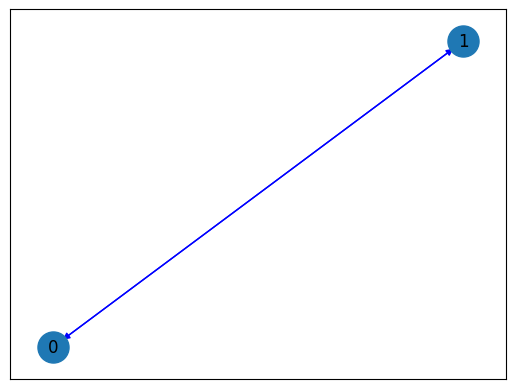

In [15]:
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos, edgelist=g.edges(), edge_color='b', arrows=True)
plt.show()

In [21]:
g.edges

OutEdgeView([(0, 1), (1, 0)])